<a href="https://colab.research.google.com/github/macorony/ConvNet_Examples/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet architecture

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# gpu available or not
print("GPU is available:", torch.cuda.is_available())

GPU is available: False


In [3]:
transform = transforms.Compose([transforms.ToTensor()])

In [4]:
train_set = torchvision.datasets.FashionMNIST('./data/fashion', train=True, transform=transform, download = True)
test_set = torchvision.datasets.FashionMNIST('./data/fashion', train=False, transform=transform, download=True)

In [72]:
print(len(train_set)%64)

32


In [83]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=10, shuffle=True, num_workers=2)

tensor([1, 4, 3, 4, 0, 9, 4, 3, 9, 2])
torch.Size([10, 1, 28, 28])


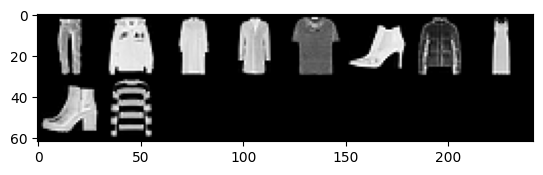

In [84]:
# Visulize
images, labels = next(iter(train_loader))
print(labels)
print(images.shape)
grid = torchvision.utils.make_grid(images)
plt.imshow(grid.permute(1,2,0))


In [85]:
# define LeNet in 2 ways
class LeNet_1(nn.Module):
  def __init__(self):
    super(LeNet_1, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0)
    self.pooling = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
    self.fc1 = nn.Linear(256, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    x = self.pooling(F.relu(self.conv1(x)))
    x = self.pooling(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
LeNet_1 = LeNet_1()

In [86]:
class LeNet_2(nn.Module):
  def __init__(self):
    super(LeNet_2, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.fc1 = nn.Linear(256, 120)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(120, 84)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x)
    out = self.fc3(x)
    return out
LeNet_2 = LeNet_2()


In [87]:
# Define a loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer_1 = optim.SGD(LeNet_1.parameters(), lr=0.001, momentum=0.9)
optimizer_2 = optim.SGD(LeNet_2.parameters(), lr=0.001, momentum=0.9)

In [88]:
# Training loop
last_loss = 0
running_loss = 0
for i, data in enumerate(train_loader):

  inputs, labels = data
  optimizer_1.zero_grad()
  outputs = LeNet_1(inputs)
  loss = loss_func(outputs, labels)
  loss.backward()
  optimizer_1.step()

  running_loss += loss
  if i % 100 == 99:
    last_loss = running_loss
    print(f"The loss is {last_loss}.")
    running_loss = 0

print('Finish Training')



The loss is 230.21315002441406.
The loss is 229.72262573242188.
The loss is 228.95498657226562.
The loss is 228.34234619140625.
The loss is 225.4904022216797.
The loss is 218.4727325439453.
The loss is 188.7869873046875.
The loss is 145.9454345703125.
The loss is 119.90406799316406.
The loss is 111.55330657958984.
The loss is 110.29486083984375.
The loss is 102.97804260253906.
The loss is 98.48507690429688.
The loss is 98.6981430053711.
The loss is 89.39833068847656.
The loss is 88.09686279296875.
The loss is 87.4323501586914.
The loss is 82.02568054199219.
The loss is 79.27873992919922.
The loss is 81.29287719726562.
The loss is 78.72586822509766.
The loss is 78.1408920288086.
The loss is 77.1835708618164.
The loss is 75.90036010742188.
The loss is 80.50601196289062.
The loss is 74.8584213256836.
The loss is 73.92212677001953.
The loss is 74.9879379272461.
The loss is 74.02025604248047.
The loss is 73.64241790771484.
The loss is 70.89423370361328.
The loss is 68.51118469238281.
The lo

In [89]:
# validation
correct = 0
total = 0
with torch.no_grad():
  for i, data in enumerate(test_loader):
    iutputs, labels = data
    outputs = LeNet_1(inputs)
    _, predicts = torch.max(outputs,1)
    total += labels.size(0)
    correct += (predicts == labels).sum().item()

print(correct/ total)




0.1002


In [90]:
print(correct//total)

0


In [81]:
(predicts == labels).sum().

tensor(13)

In [23]:
10 % 3

1